In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
matches_df=pd.read_csv("/kaggle/input/ipl/matches.csv")
score_df=pd.read_csv("/kaggle/input/ipl/deliveries.csv")

In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


DATA INFORMATION

In [6]:
matches_df.info()
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
matches_df['id'].max()

636

In [9]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [10]:
matches_df['season'].value_counts()  #no of matches played per season

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [11]:
matches_df['team1'].unique()  ##no of teams 

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [12]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
score_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [14]:
grp = matches_df.groupby('season')

In [15]:
grp.groups

{2008: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116], 2009: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173], 2010: [174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233], 2011: [234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,

In [16]:
df_2008 = grp.get_group(2008)

In [17]:
df_2008.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [18]:
df_2008.team2.unique()  #8

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers'],
      dtype=object)

In [19]:
df_2009 = grp.get_group(2009)

In [20]:
df_2009.team1.unique() #8

array(['Mumbai Indians', 'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Deccan Chargers',
       'Delhi Daredevils', 'Rajasthan Royals'], dtype=object)

In [21]:
df_2010 = grp.get_group(2010)

In [22]:
df_2010.team1.unique()  #8

array(['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Daredevils'],
      dtype=object)

In [23]:
df_2011 = grp.get_group(2011)

In [24]:
df_2011.team1.unique()  #10

array(['Chennai Super Kings', 'Deccan Chargers', 'Kochi Tuskers Kerala',
       'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Pune Warriors'], dtype=object)

In [25]:
df_2012 = grp.get_group(2012)

In [26]:
df_2012.team1.unique()  #9

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Pune Warriors',
       'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils'], dtype=object)

In [27]:
df_2013 = grp.get_group(2013)
df_2013.team1.unique()  #9

array(['Delhi Daredevils', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Mumbai Indians',
       'Pune Warriors', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Chennai Super Kings'], dtype=object)

In [28]:
sgps = matches_df.groupby('season')

In [29]:
sgps.team1.nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
Name: team1, dtype: int64

In [30]:
sgps.team2.nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
Name: team2, dtype: int64

In [31]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [32]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [33]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['player_of_match']

'LMP Simmons'

In [34]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [35]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['player_of_match']

'CA Lynn'

In [36]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [37]:
df_2008.player_of_match.value_counts()

SE Marsh            5
SR Watson           4
YK Pathan           4
SM Pollock          2
AC Gilchrist        2
Sohail Tanvir       2
ST Jayasuriya       2
MS Dhoni            2
SC Ganguly          2
M Ntini             2
V Sehwag            2
SP Goswami          1
A Kumble            1
KD Karthik          1
JA Morkel           1
DJ Bravo            1
P Kumar             1
GC Smith            1
DPMD Jayawardene    1
A Mishra            1
Shoaib Akhtar       1
Umar Gul            1
L Balaji            1
CRD Fernando        1
BB McCullum         1
A Nehra             1
S Sreesanth         1
MEK Hussey          1
IK Pathan           1
R Vinay Kumar       1
SA Asnodkar         1
GD McGrath          1
SM Katich           1
JDP Oram            1
KC Sangakkara       1
ML Hayden           1
DJ Hussey           1
MV Boucher          1
MF Maharoof         1
SK Raina            1
Name: player_of_match, dtype: int64

In [38]:
df_2013.winner.value_counts()

Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
Name: winner, dtype: int64

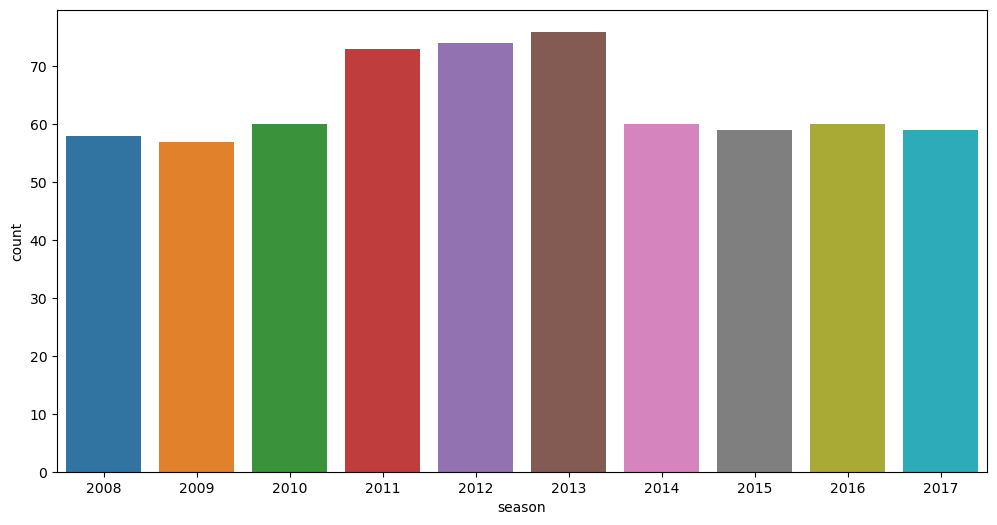

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',data=matches_df)
plt.show()

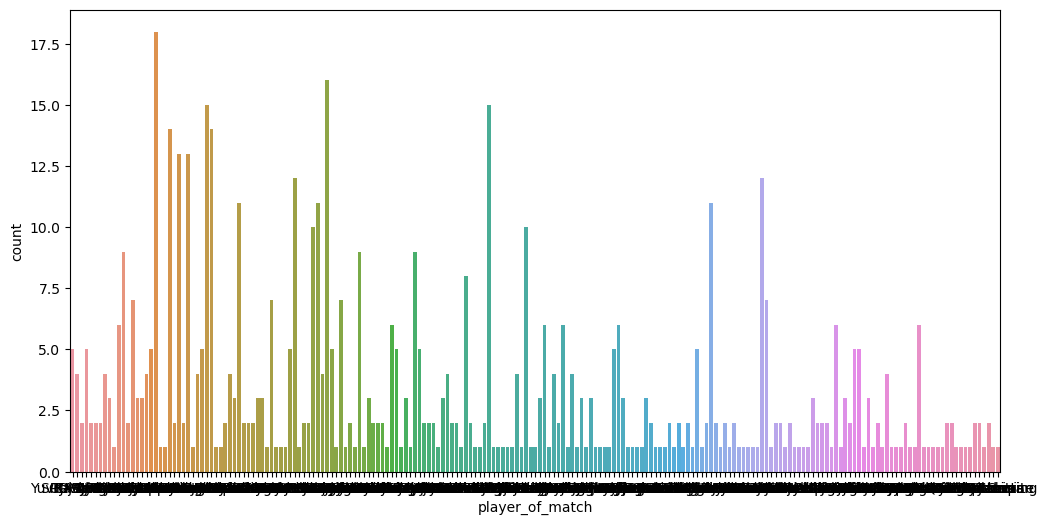

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='player_of_match',data=matches_df)
plt.show()

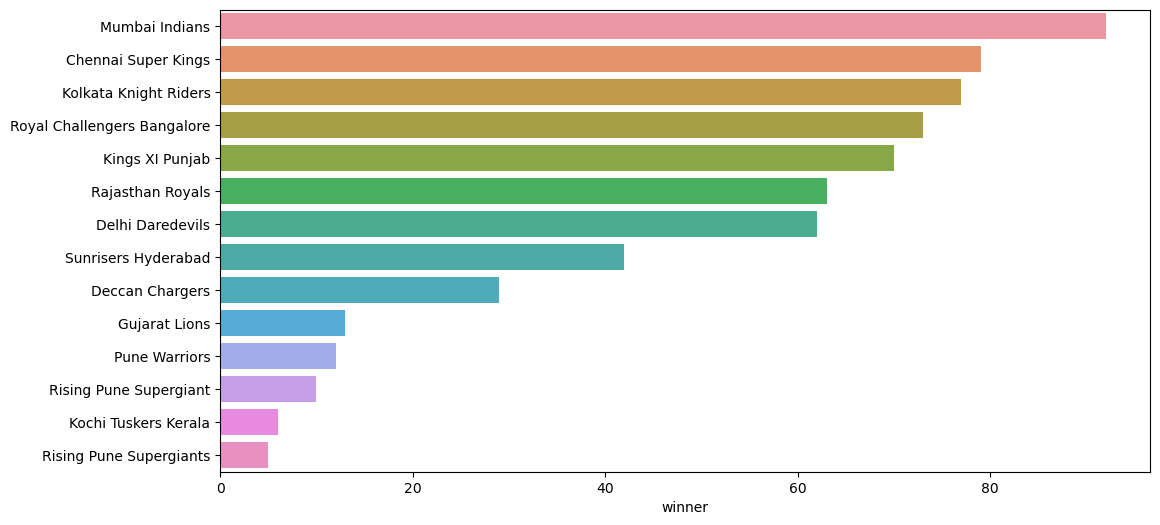

In [41]:
plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index,x = data,orient='h')
plt.show()

In [42]:
data = matches_df.winner.value_counts()
data

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

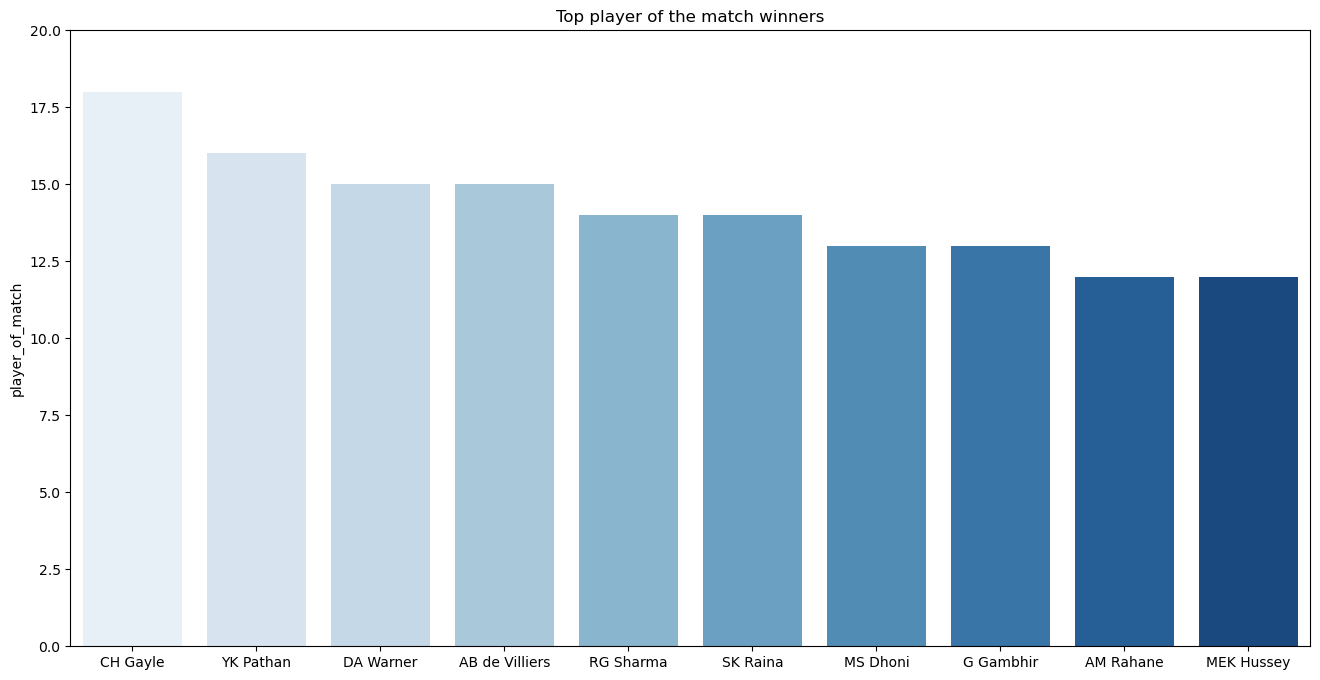

In [43]:
top_players = matches_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match winners")
sns.barplot(x = top_players.index,  y = top_players, orient = 'v',palette = "Blues" );
plt.show()

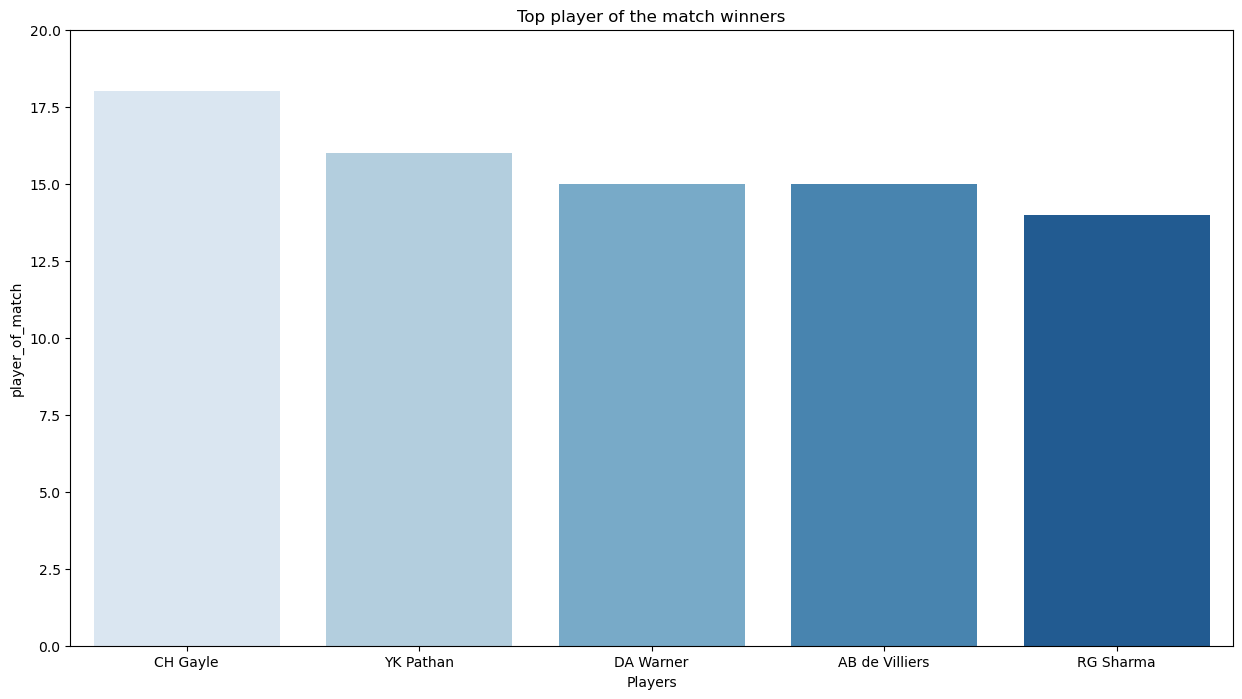

In [44]:
top_players = matches_df.player_of_match.value_counts()[:5]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_xlabel("Players")
ax.set_ylabel("Count")
ax.set_title("Top player of the match winners")
sns.barplot(x = top_players.index,  y = top_players, orient = 'v',palette = "Blues" )
plt.show()

In [45]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

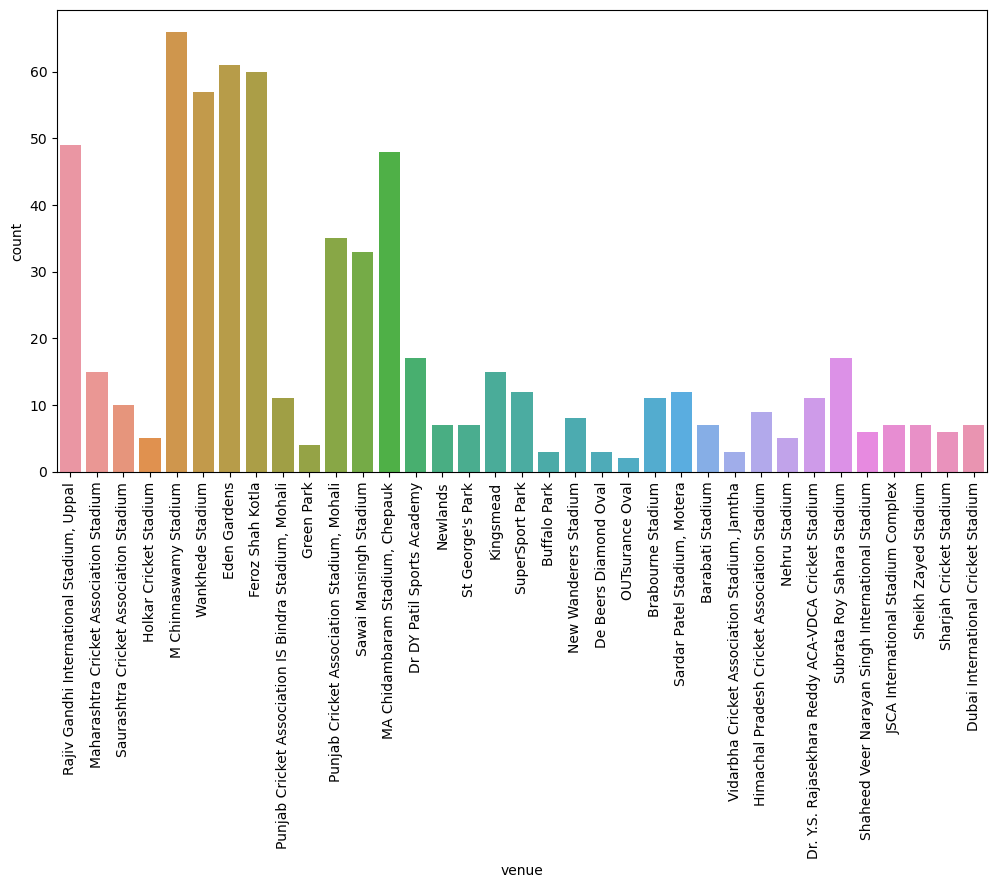

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'venue',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

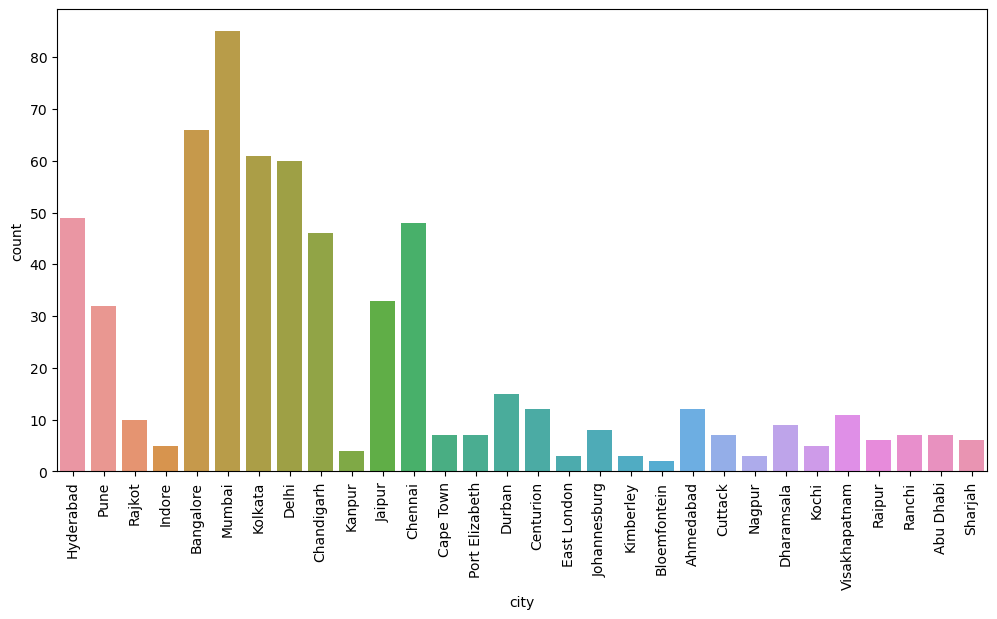

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'city',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

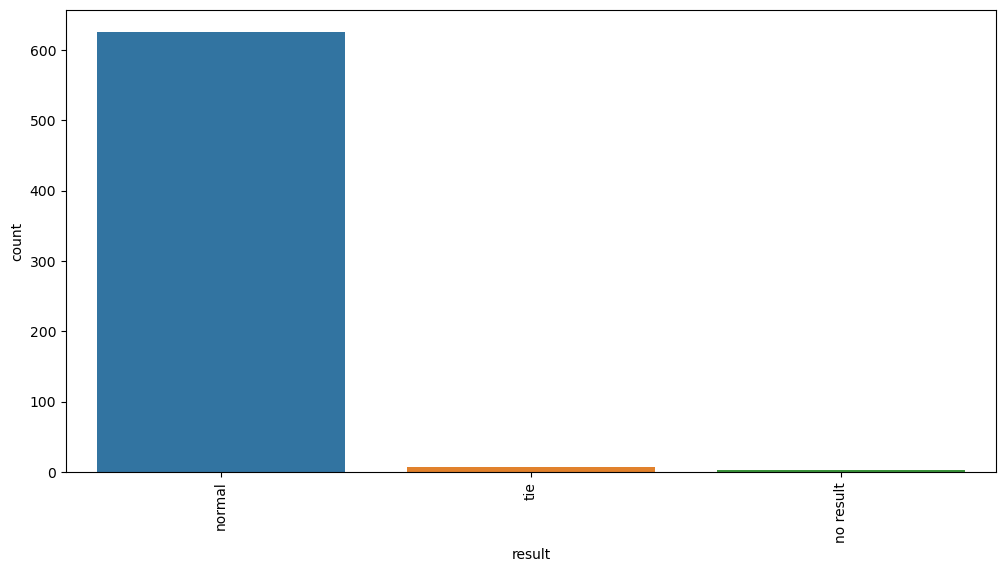

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'result',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

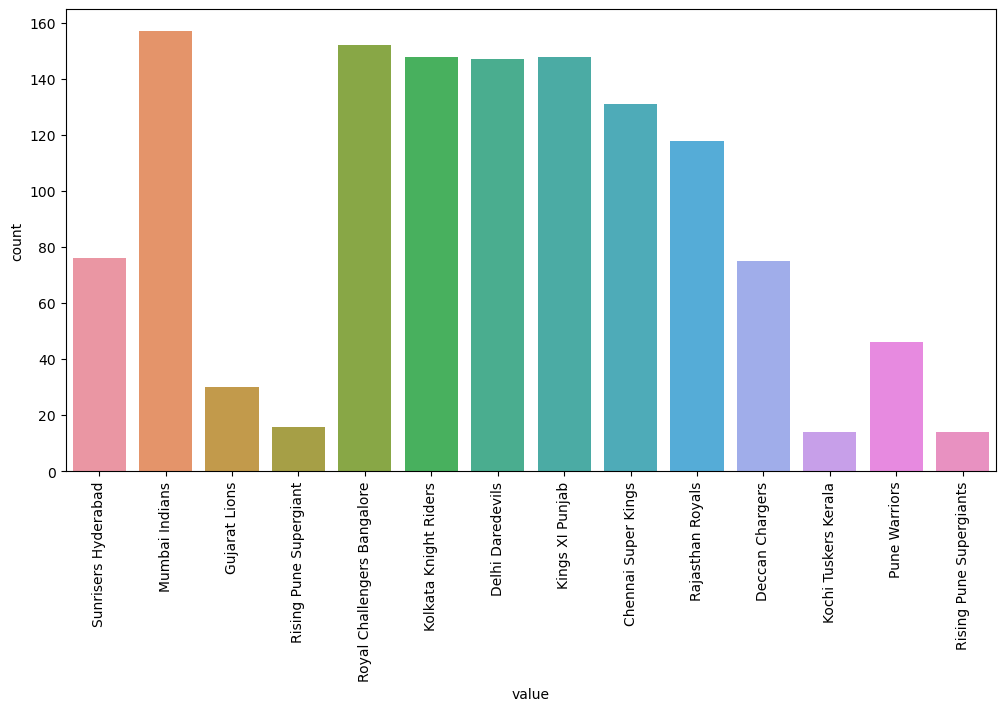

In [49]:
temp_df = pd.melt(matches_df, id_vars=['id','season'],value_vars=['team1','team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

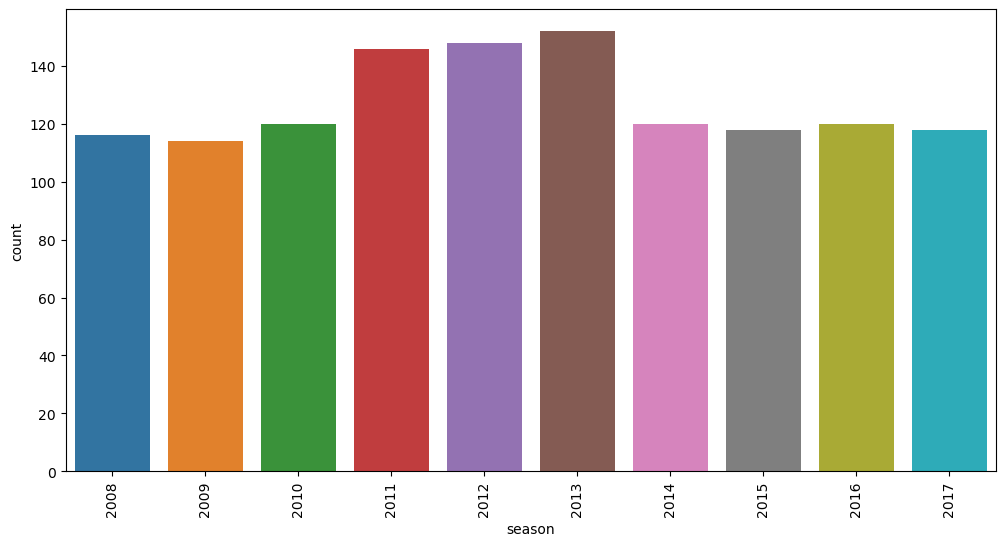

In [50]:
temp_df = pd.melt(matches_df, id_vars=['id','season'],value_vars=['team1','team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='season',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

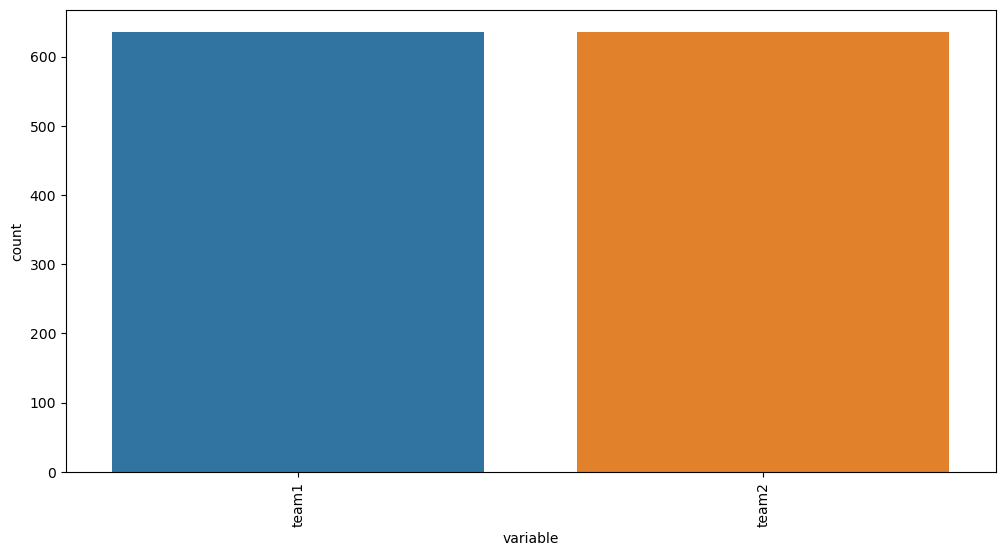

In [51]:
temp_df = pd.melt(matches_df, id_vars=['id','season'],value_vars=['team1','team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='variable',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

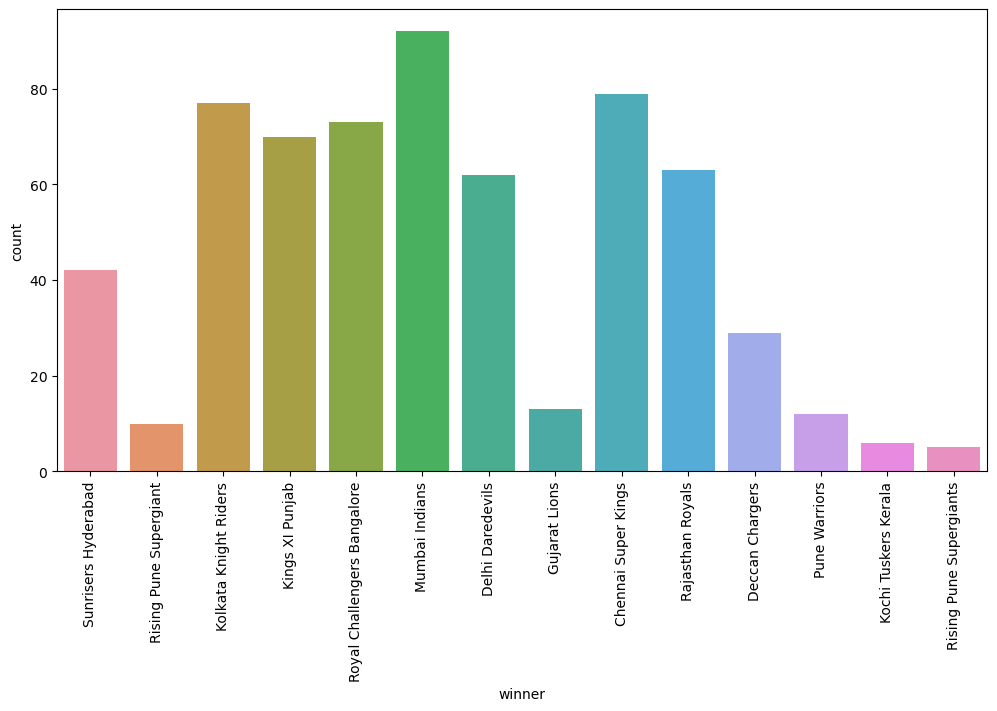

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=matches_df)
plt.xticks(rotation=90)
plt.show()

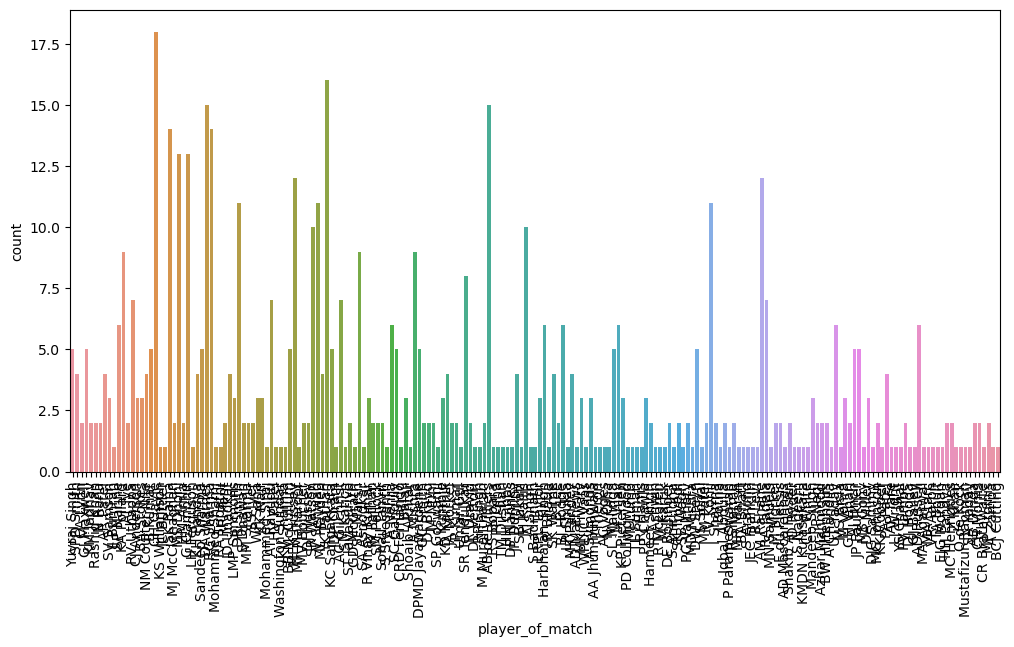

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x='player_of_match',data=matches_df)
plt.xticks(rotation=90)
plt.show()

In [55]:
df_2012.winner.value_counts()

Kolkata Knight Riders          12
Delhi Daredevils               11
Mumbai Indians                 10
Chennai Super Kings            10
Royal Challengers Bangalore     8
Kings XI Punjab                 8
Rajasthan Royals                7
Pune Warriors                   4
Deccan Chargers                 4
Name: winner, dtype: int64

In [56]:
grp = matches_df.groupby('venue')
grp

In [57]:
grp.groups

{'Barabati Stadium': [185, 188, 336, 347, 485, 490, 496], 'Brabourne Stadium': [175, 187, 190, 193, 200, 206, 220, 514, 552, 557, 569], 'Buffalo Park': [137, 143, 149], 'De Beers Diamond Oval': [150, 151, 154], 'Dr DY Patil Sports Academy': [71, 81, 85, 116, 174, 198, 230, 231, 232, 233, 238, 243, 249, 263, 276, 294, 297], 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': [312, 315, 528, 530, 536, 612, 615, 618, 622, 624, 628], 'Dubai International Cricket Stadium': [461, 462, 466, 468, 469, 474, 476], 'Eden Gardens': [10, 13, 22, 26, 30, 39, 52, 63, 74, 87, 94, 102, 104, 111, 177, 181, 203, 207, 212, 226, 229, 239, 250, 254, 257, 269, 280, 302, 308, 321, 324, 343, 352, 362, 367, 381, 396, 405, 412, 414, 426, 455, 456, 503, 505, 510, 513, 517, 521, 526, 544, 554, 559, 575, 577, 580, 607, 613, 620, 623, 630], 'Feroz Shah Kotla': [14, 17, 38, 40, 43, 50, 54, 61, 75, 86, 97, 99, 108, 182, 184, 199, 202, 208, 217, 228, 237, 252, 258, 262, 265, 273, 300, 317, 322, 334, 341, 344, 356, 3

In [58]:
df_bngr = grp.get_group('M Chinnaswamy Stadium')
df_bngr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,617,2016,Bangalore,2016-05-11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KH Pandya,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


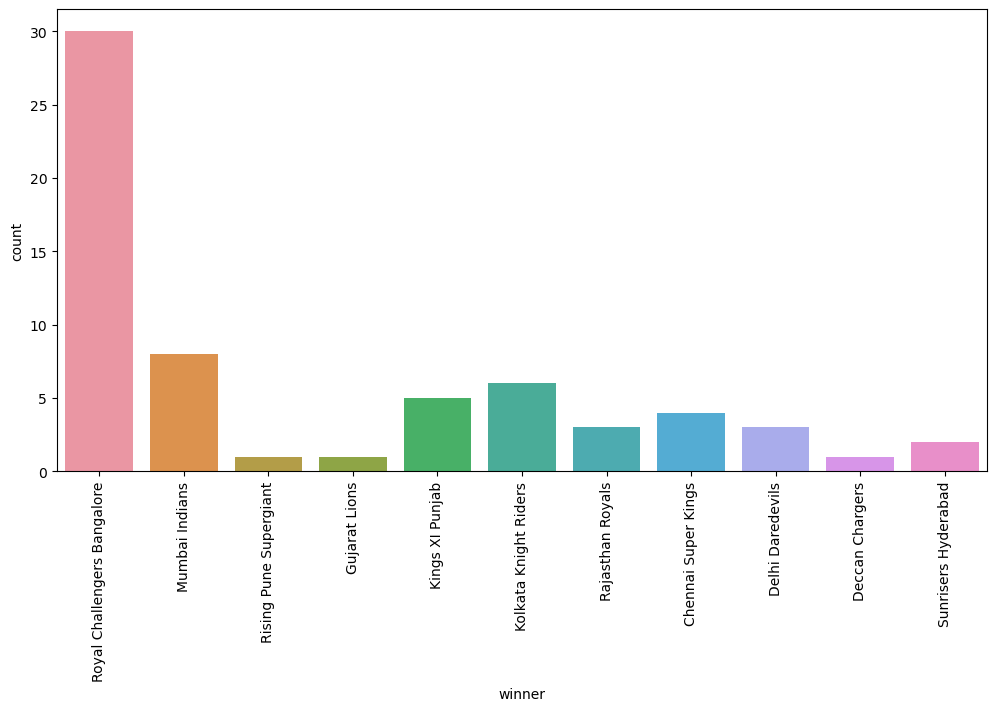

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=df_bngr)
plt.xticks(rotation=90)
plt.show()

In [60]:
df_bngr = grp.get_group('MA Chidambaram Stadium, Chepauk')
df_bngr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
84,85,2008,Chennai,2008-05-06,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",MR Benson,RB Tiffin,NaN
90,91,2008,Chennai,2008-05-10,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN
106,107,2008,Chennai,2008-05-21,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,14,0,A Kumble,"MA Chidambaram Stadium, Chepauk",DJ Harper,I Shivram,NaN
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
178,179,2010,Chennai,2010-03-14,Deccan Chargers,Chennai Super Kings,Deccan Chargers,bat,normal,0,Deccan Chargers,31,0,WPUJC Vaas,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
201,202,2010,Chennai,2010-03-31,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk",BG Jerling,RE Koertzen,NaN


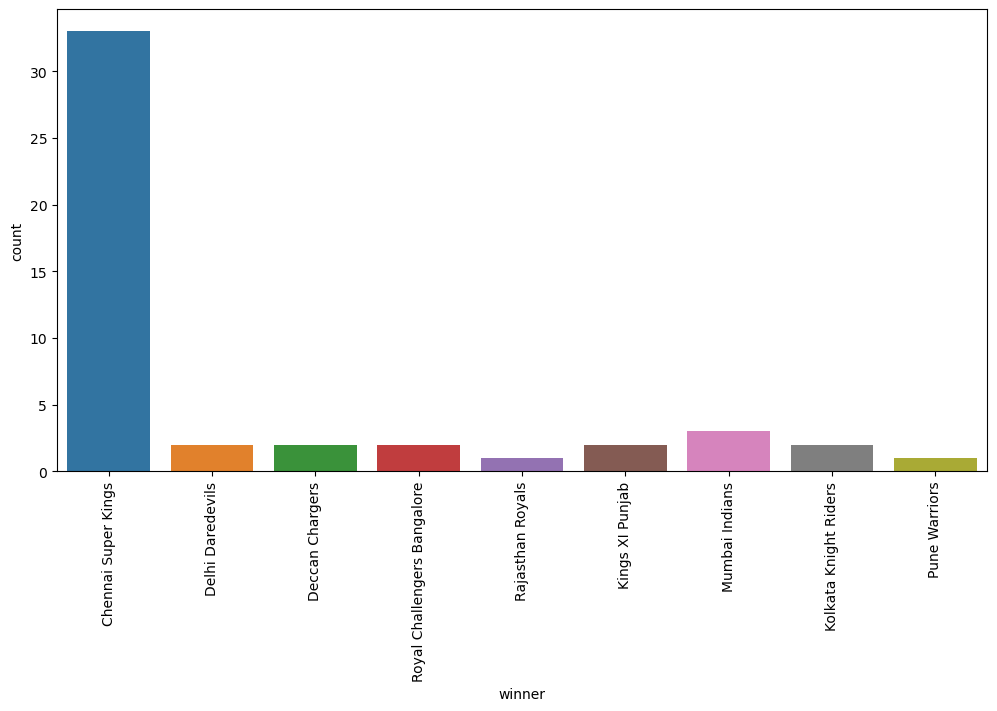

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=df_bngr)
plt.xticks(rotation=90)
plt.show()

In [62]:
matches_df.venue.value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [63]:
grp = matches_df.groupby('toss_winner')
grp

In [64]:
grp.groups

{'Chennai Super Kings': [60, 73, 78, 82, 86, 117, 121, 143, 148, 158, 165, 168, 181, 189, 191, 205, 210, 215, 223, 227, 231, 233, 234, 247, 256, 271, 280, 288, 296, 303, 306, 323, 346, 351, 360, 363, 367, 380, 390, 395, 403, 421, 424, 445, 451, 453, 459, 464, 477, 482, 485, 489, 498, 509, 514, 515, 520, 532, 541, 550, 553, 558, 562, 564, 574, 575], 'Deccan Chargers': [63, 65, 71, 79, 84, 97, 101, 110, 113, 123, 127, 130, 139, 146, 154, 157, 162, 163, 171, 174, 178, 188, 194, 198, 213, 224, 228, 232, 252, 259, 274, 285, 291, 294, 312, 315, 322, 327, 330, 340, 347, 358, 365], 'Delhi Daredevils': [14, 17, 23, 38, 40, 43, 48, 50, 72, 81, 99, 103, 108, 114, 119, 124, 132, 135, 140, 153, 164, 166, 169, 176, 179, 182, 184, 199, 202, 208, 217, 237, 240, 249, 265, 268, 278, 281, 292, 300, 308, 311, 317, 326, 334, 344, 356, 371, 373, 379, 393, 411, 427, 432, 437, 484, 494, 497, 507, 518, 530, 547, 552, 555, 582, 586, 598, 606, 611, 617, 622, 627], 'Gujarat Lions': [12, 19, 22, 25, 29, 33, 45, 57

In [65]:
df_delhi = grp.get_group('Delhi Daredevils')
df_delhi

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
40,41,2017,Delhi,2017-05-04,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,RR Pant,Feroz Shah Kotla,M Erasmus,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,607,2016,Rajkot,2016-05-03,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,RR Pant,Saurashtra Cricket Association Stadium,CB Gaffaney,BNJ Oxenford,NaN
611,612,2016,Chandigarh,2016-05-07,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Kings XI Punjab,9,0,MP Stoinis,"Punjab Cricket Association IS Bindra Stadium, ...",HDPK Dharmasena,CK Nandan,NaN
617,618,2016,Hyderabad,2016-05-12,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN


In [66]:
df_delhi.toss_winner.value_counts()

Delhi Daredevils    72
Name: toss_winner, dtype: int64

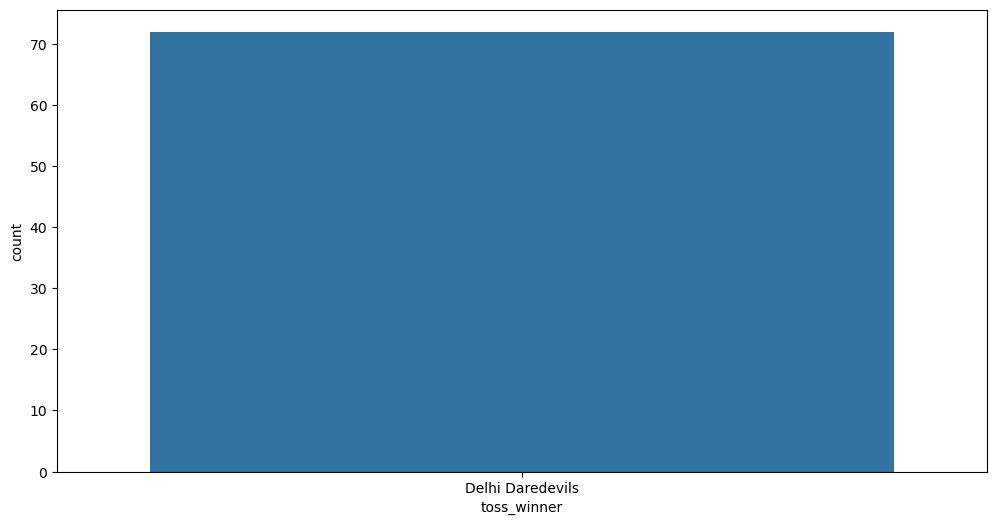

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner',data=df_delhi)
plt.xticks(rotation=0)
plt.show()

In [68]:
temp_df = matches_df.drop_duplicates(subset=['season'],keep='last')
temp_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [69]:
temp_df = matches_df.drop_duplicates(subset=['season'],keep='last')
temp_df.iloc[:,[1,10]]


,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


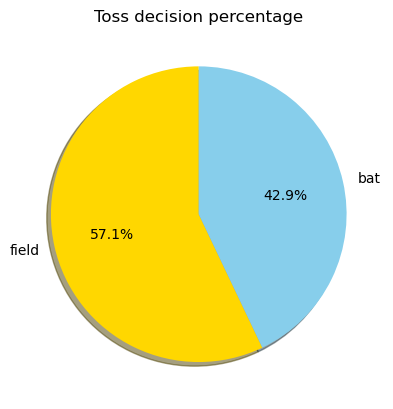

In [70]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold','skyblue']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [71]:
grp = matches_df.groupby('season')
grp

In [72]:
grp.groups

{2008: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116], 2009: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173], 2010: [174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233], 2011: [234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,

In [73]:
df_2016 = grp.get_group(2016)
df_2016

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
576,577,2016,Mumbai,2016-04-09,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
577,578,2016,Kolkata,2016-04-10,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,AD Russell,Eden Gardens,S Ravi,C Shamshuddin,NaN
578,579,2016,Chandigarh,2016-04-11,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
579,580,2016,Bangalore,2016-04-12,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
580,581,2016,Kolkata,2016-04-13,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens,Nitin Menon,S Ravi,NaN
581,582,2016,Rajkot,2016-04-14,Rising Pune Supergiants,Gujarat Lions,Rising Pune Supergiants,bat,normal,0,Gujarat Lions,0,7,AJ Finch,Saurashtra Cricket Association Stadium,VA Kulkarni,CK Nandan,NaN
582,583,2016,Delhi,2016-04-15,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,A Mishra,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
583,584,2016,Hyderabad,2016-04-16,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,8,G Gambhir,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN
584,585,2016,Mumbai,2016-04-16,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,3,AJ Finch,Wankhede Stadium,HDPK Dharmasena,VK Sharma,NaN
585,586,2016,Chandigarh,2016-04-17,Rising Pune Supergiants,Kings XI Punjab,Rising Pune Supergiants,bat,normal,0,Kings XI Punjab,0,6,M Vohra,"Punjab Cricket Association IS Bindra Stadium, ...",S Ravi,C Shamshuddin,NaN


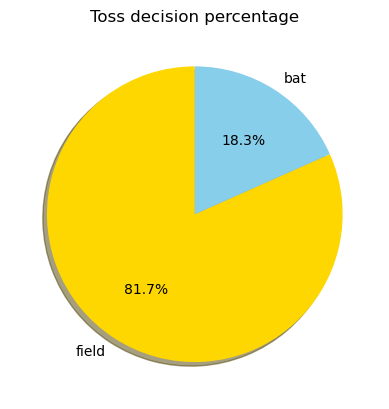

In [74]:
temp_series = df_2016.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold','skyblue']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [75]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [76]:
grp = matches_df.groupby('team1')
grp

In [77]:
grp.groups

{'Chennai Super Kings': [60, 66, 73, 78, 82, 84, 90, 95, 116, 121, 130, 136, 140, 143, 148, 158, 165, 168, 172, 181, 193, 205, 210, 215, 223, 231, 233, 234, 242, 247, 251, 261, 271, 280, 284, 288, 296, 301, 306, 307, 312, 317, 323, 331, 346, 351, 354, 370, 378, 379, 380, 403, 417, 421, 424, 434, 441, 445, 453, 459, 464, 466, 477, 498, 503, 506, 518, 520, 526, 532, 537, 541, 546, 553, 558, 562, 564], 'Deccan Chargers': [63, 65, 67, 76, 79, 88, 107, 113, 123, 127, 135, 139, 146, 150, 154, 173, 178, 185, 188, 194, 219, 228, 232, 235, 244, 248, 252, 264, 278, 285, 291, 299, 315, 322, 327, 330, 336, 340, 345, 347, 355, 365, 375], 'Delhi Daredevils': [8, 14, 17, 30, 34, 50, 72, 75, 86, 92, 97, 99, 124, 132, 157, 160, 164, 166, 171, 184, 196, 199, 202, 208, 217, 237, 240, 258, 262, 268, 273, 300, 341, 344, 356, 363, 381, 393, 400, 418, 427, 432, 442, 458, 479, 482, 484, 488, 501, 511, 522, 530, 534, 538, 542, 555, 570, 577, 592, 601, 608, 624, 631], 'Gujarat Lions': [2, 5, 15, 33, 37, 40, 48,

In [78]:
df_rcb = grp.get_group('Royal Challengers Bangalore')
df_rcb

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2016,Bangalore,2016-05-02,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M Chinnaswamy Stadium,M Erasmus,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
616,617,2016,Bangalore,2016-05-11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KH Pandya,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


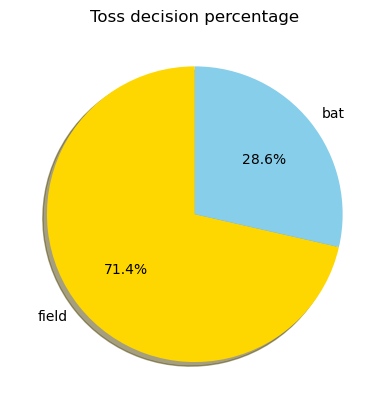

In [79]:
temp_series = df_rcb.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold','skyblue']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [80]:
grp = matches_df.groupby('team2')
grp

In [81]:
grp.groups

{'Chennai Super Kings': [70, 86, 102, 106, 109, 113, 115, 117, 124, 151, 161, 178, 184, 189, 191, 197, 201, 221, 227, 256, 263, 275, 303, 319, 333, 342, 360, 363, 367, 385, 390, 395, 398, 405, 409, 413, 429, 451, 456, 469, 473, 482, 485, 489, 493, 509, 514, 515, 529, 550, 568, 572, 574, 575], 'Deccan Chargers': [71, 84, 91, 97, 101, 110, 120, 130, 143, 157, 162, 163, 170, 171, 174, 198, 203, 206, 209, 213, 215, 224, 231, 239, 259, 271, 274, 294, 312, 351, 358, 372], 'Delhi Daredevils': [4, 20, 23, 38, 40, 43, 48, 54, 61, 65, 78, 81, 94, 103, 108, 114, 119, 128, 135, 140, 145, 149, 153, 169, 176, 179, 182, 188, 212, 220, 223, 228, 249, 252, 265, 278, 281, 288, 292, 308, 311, 317, 322, 326, 330, 334, 338, 348, 368, 371, 373, 377, 379, 384, 389, 403, 407, 411, 423, 437, 445, 450, 462, 464, 468, 472, 494, 497, 507, 518, 527, 544, 547, 552, 560, 564, 582, 586, 598, 606, 611, 617, 622, 627], 'Gujarat Lions': [12, 19, 22, 25, 29, 45, 578, 581, 584, 594, 600, 603, 613, 619, 626, 629], 'Kings X

In [82]:
df_rcb1 = grp.get_group('Royal Challengers Bangalore')
df_rcb1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
32,33,2017,Pune,2017-04-29,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,2016,Bangalore,2016-05-07,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,CB Gaffaney,BNJ Oxenford,NaN
623,624,2016,Kolkata,2016-05-16,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,V Kohli,Eden Gardens,CB Gaffaney,A Nand Kishore,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


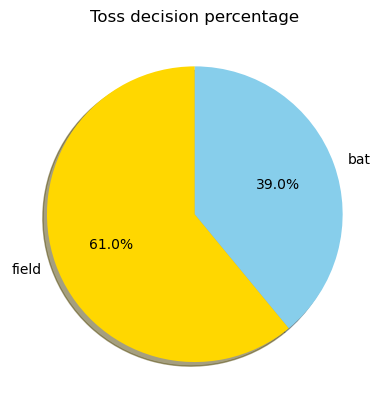

In [83]:
temp_series = df_rcb1.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold','skyblue']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss decision percentage")
plt.show()

# Score Data Set


In [84]:
score_df = pd.read_csv("/kaggle/input/ipl/deliveries.csv")
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**Batter Analysis**

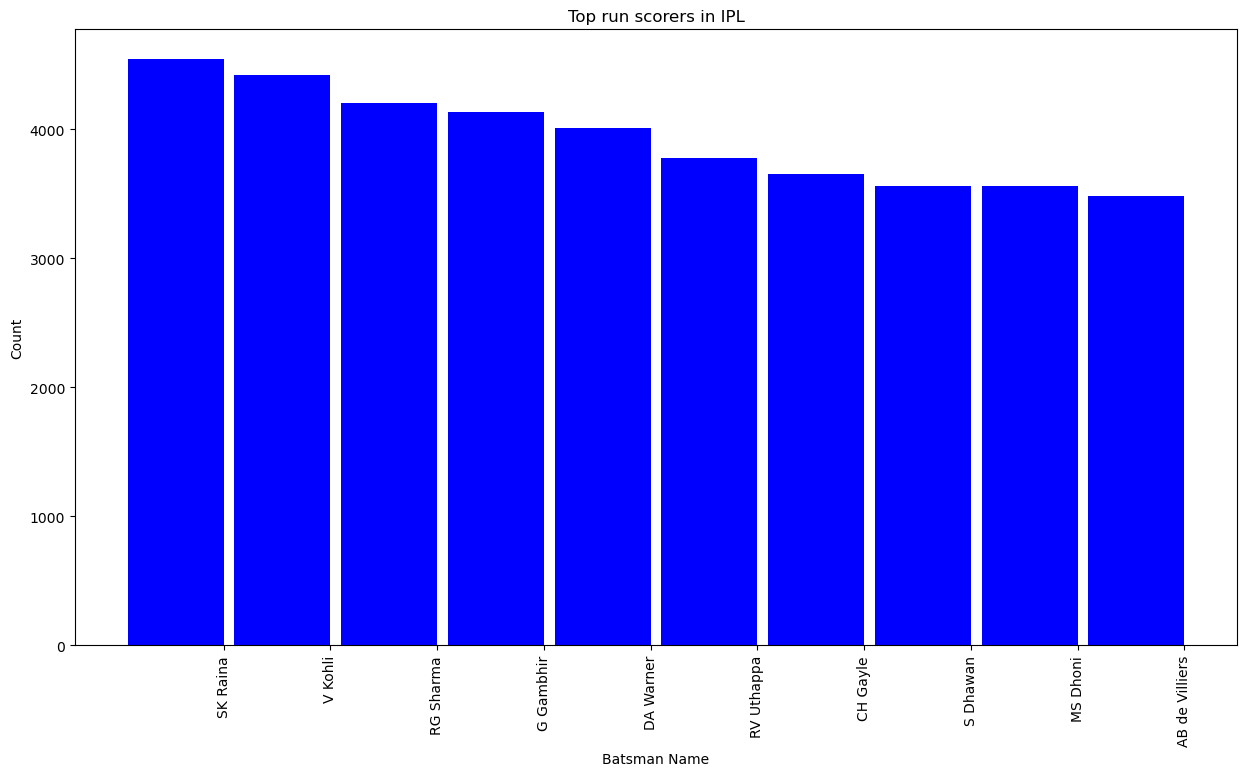

In [85]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax =plt.subplots(figsize=(15,8))
rects = ax.bar(ind,np.array(temp_df['batsman_runs']),width=width,color='blue')
ax.set_xticks(ind+(width)/2.)
ax.set_xticklabels(labels,rotation = 'vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel("Batsman Name")
plt.show()